In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('/kaggle/input/football-fifa-womens-world-cup-1991-2023/matches_1991_2023.csv')
data.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Colombia,Jamaica,1,0.9,NaN,0,1.2,NaN,Nelson Abadía,Catalina Usme,...,NaN,NaN,NaN,NaN,NaN,NaN,['70’|1:0|Daniela Arias'],"['41’|0:0|Chantelle Swaby', '45+1’|0:0|Drew Sp...","['87’|1:0|Daniela Montoya|for Leicy Santos', '...","['46’|0:0|Atlanta Primus|for Kiki Van Zanten',..."
1,France,Morocco,4,2.0,NaN,0,0.0,NaN,Hervé Renard,Wendie Renard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['57’|3:0|Hanane Aït El Haj'],"['64’|3:0|Vicki Bècho|for Sandie Toletti', '81...","['64’|3:0|Sarah Kassi|for Élodie Nakkach', '64..."
2,England,Nigeria,0,0.9,4.0,0,1.2,2.0,Sarina Wiegman,Millie Bright,...,['1|0:0|Georgia Stanway'],"['2|0:0|Desire Oparanozie', '4|1:0|Michelle Al...",Lauren James · 87’,NaN,NaN,NaN,NaN,NaN,"['88’|0:0|Chloe Kelly|for Alessia Russo', '105...","['58’|0:0|Asisat Oshoala|for Ifeoma Onumonu', ..."
3,Australia,Denmark,2,1.1,NaN,0,0.7,NaN,Tony Gustavsson,Steph Catley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['66’|1:0|Janni Thomsen'],"['80’|2:0|Sam Kerr|for Hayley Raso', '80’|2:0|...","['63’|1:0|Signe Bruun|for Rikke Sevecke', '63’..."
4,Netherlands,South Africa,2,1.6,NaN,0,1.2,NaN,Andries Jonker,Sherida Spitse,...,NaN,NaN,NaN,NaN,NaN,NaN,['67’|1:0|Daniëlle van de Donk'],NaN,['76’|2:0|Damaris Egurrola|for Daniëlle van de...,['30’|1:0|Wendy Shongwe|for Jermaine Seoposenw...


**Data Preprocessing**

In [3]:
data.describe().style.background_gradient(cmap='Spectral_r')

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Year
count,340.000000,108.000000,10.000000,340.000000,108.000000,10.000000,340.000000,340.000000
mean,1.882353,1.651852,3.900000,1.232353,1.307407,3.400000,23205.741176,2009.800000
std,1.931950,1.305952,0.875595,1.474107,1.161992,1.505545,17056.132578,10.299125
min,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1991.000000
25%,1.000000,0.700000,3.000000,0.000000,0.500000,2.500000,12051.500000,2003.000000
50%,1.000000,1.400000,4.000000,1.000000,1.100000,4.000000,20021.000000,2011.000000
75%,3.000000,2.125000,4.750000,2.000000,1.700000,4.000000,31148.000000,2019.000000
max,13.000000,7.100000,5.000000,8.000000,6.500000,5.000000,90185.000000,2023.000000


In [4]:
data.isna().sum()/len(data)*100

home_team                           0.000000
away_team                           0.000000
home_score                          0.000000
home_xg                            68.235294
home_penalty                       97.058824
away_score                          0.000000
away_xg                            68.235294
away_penalty                       97.058824
home_manager                       52.941176
home_captain                       52.941176
away_manager                       52.941176
away_captain                       52.941176
Attendance                          0.000000
Venue                               0.000000
Officials                           0.588235
Round                               0.000000
Date                                0.000000
Score                               0.000000
Referee                             1.764706
Notes                              94.705882
Host                                0.000000
Year                                0.000000
home_goal 

In [5]:
data['home_team'].unique()

array(['Colombia', 'France', 'England', 'Australia', 'Netherlands',
       'Sweden', 'Switzerland', 'Japan', 'Morocco', 'Korea Republic',
       'South Africa', 'Argentina', 'Panama', 'Jamaica', 'Haiti',
       'Portugal', 'Vietnam', 'China PR', 'Costa Rica', 'Canada',
       'Republic of Ireland', 'Norway', 'Germany', 'United States',
       'Spain', 'New Zealand', 'Italy', 'Brazil', 'Zambia', 'Denmark',
       'Nigeria', 'Philippines', 'Cameroon', 'Thailand', 'Scotland',
       'Chile', 'Mexico', 'Ecuador', "Côte d'Ivoire", 'Equatorial Guinea',
       'Korea DPR', 'Ghana', 'Russia', 'Chinese Taipei'], dtype=object)

In [6]:
data['home_team']=data['home_team'].apply(lambda x: x.upper() if isinstance(x,str) else x)
data['home_team'].unique()

array(['COLOMBIA', 'FRANCE', 'ENGLAND', 'AUSTRALIA', 'NETHERLANDS',
       'SWEDEN', 'SWITZERLAND', 'JAPAN', 'MOROCCO', 'KOREA REPUBLIC',
       'SOUTH AFRICA', 'ARGENTINA', 'PANAMA', 'JAMAICA', 'HAITI',
       'PORTUGAL', 'VIETNAM', 'CHINA PR', 'COSTA RICA', 'CANADA',
       'REPUBLIC OF IRELAND', 'NORWAY', 'GERMANY', 'UNITED STATES',
       'SPAIN', 'NEW ZEALAND', 'ITALY', 'BRAZIL', 'ZAMBIA', 'DENMARK',
       'NIGERIA', 'PHILIPPINES', 'CAMEROON', 'THAILAND', 'SCOTLAND',
       'CHILE', 'MEXICO', 'ECUADOR', "CÔTE D'IVOIRE", 'EQUATORIAL GUINEA',
       'KOREA DPR', 'GHANA', 'RUSSIA', 'CHINESE TAIPEI'], dtype=object)

In [7]:
data.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

# **Explore Data Analysis Process (EDA)**

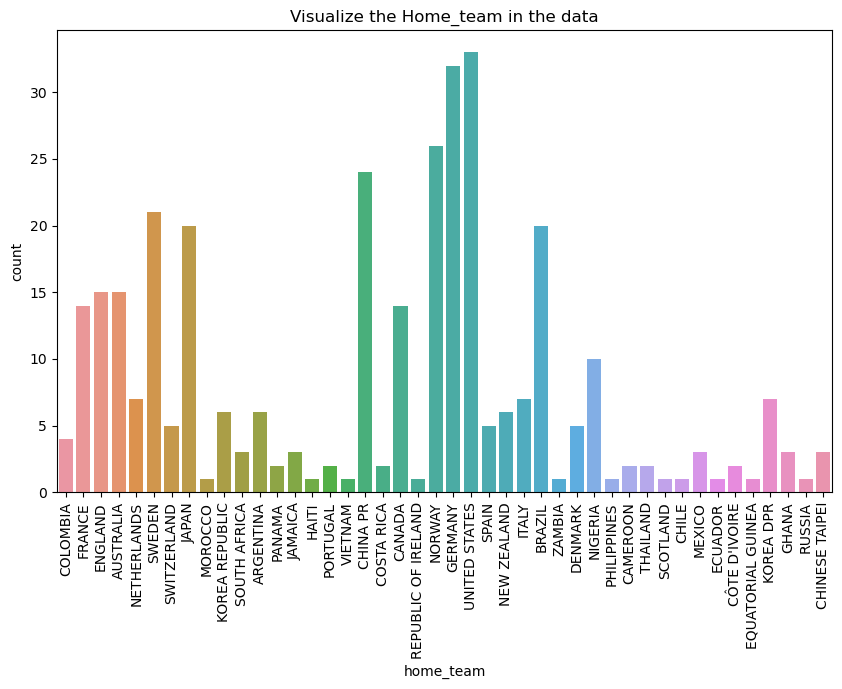

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x=data['home_team'])
plt.title("Visualize the Home_team in the data")
plt.xticks(rotation=90)
plt.show()

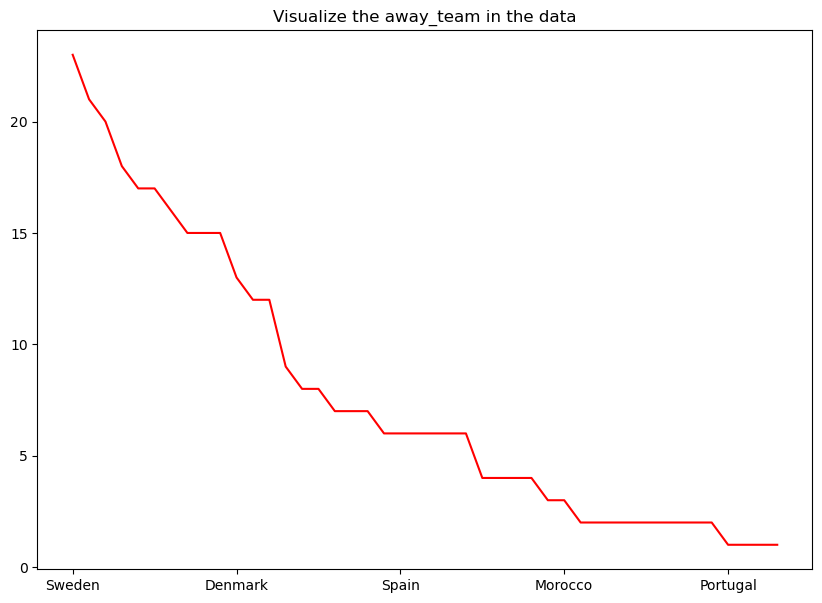

In [9]:
plt.figure(figsize=(10,7))
data['away_team'].value_counts().plot(kind='line',color='red')
plt.title("Visualize the away_team in the data")
plt.show()

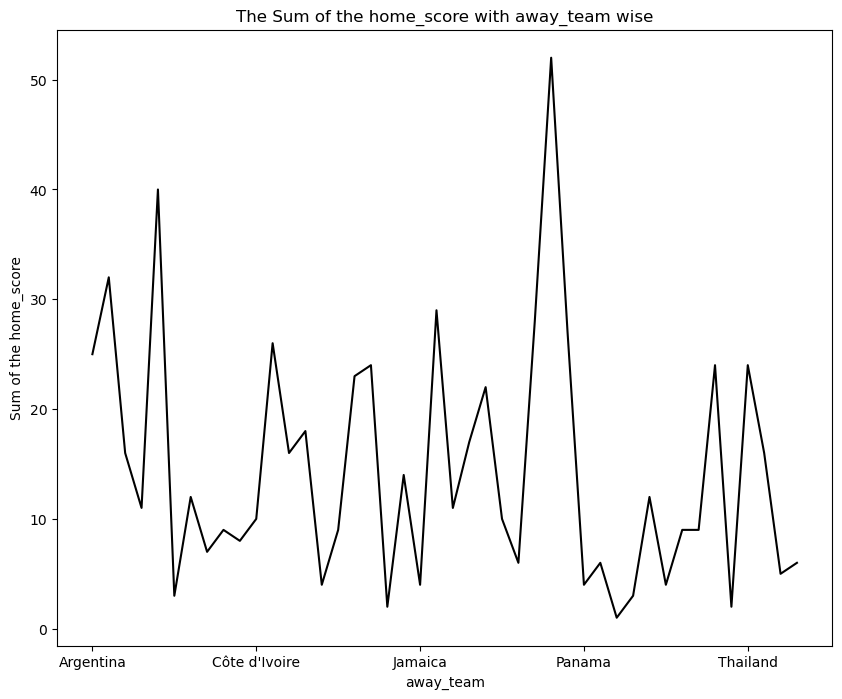

In [10]:
data.groupby('away_team')['home_score'].sum()\
.plot(kind='line',color='black',figsize=(10,8))
plt.title("The Sum of the home_score with away_team wise")
plt.xlabel("away_team")
plt.ylabel("Sum of the home_score")
plt.show()

# Observations:

In [11]:
pivot_table=data.pivot_table(index='home_team',columns='home_score',values='home_captain',aggfunc=np.sum)
pivot_table.style.background_gradient(cmap='tab20b_r')

home_score,0,1,2,3,4,5,6,7,8,10,11,13
home_team,,,,,,,,,,,,
ARGENTINA,Vanina CorreaEstefanía Banini,0,Vanina Correa,nan,nan,nan,nan,nan,nan,nan,nan,nan
AUSTRALIA,Lisa De Vanna,Steph CatleySam KerrLisa De Vanna,Steph CatleySteph CatleyLisa De Vanna,Sam Kerr,0,nan,nan,nan,nan,nan,nan,nan
BRAZIL,Marta,Marta,Marta,Mônica,Rafaelle,0,nan,0,nan,nan,nan,nan
CAMEROON,nan,nan,Gabrielle Onguene,nan,nan,nan,Christine Manie,nan,nan,nan,nan,nan
CANADA,Christine SinclairChristine Sinclair,Christine SinclairChristine SinclairChristine Sinclair,Jessie FlemingChristine Sinclair,0,0,nan,nan,nan,nan,nan,nan,nan
CHILE,Christiane Endler,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHINA PR,Wu HaiyanWu Haiyan,Wang ShanshanWang ShanshanWu HaiyanWu Haiyan,Wu Haiyan,0,0,nan,nan,0,nan,nan,nan,nan
CHINESE TAIPEI,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan
COLOMBIA,0,Catalina UsmeNatalia Gaitán,Daniela Montoya,nan,nan,nan,nan,nan,nan,nan,nan,nan


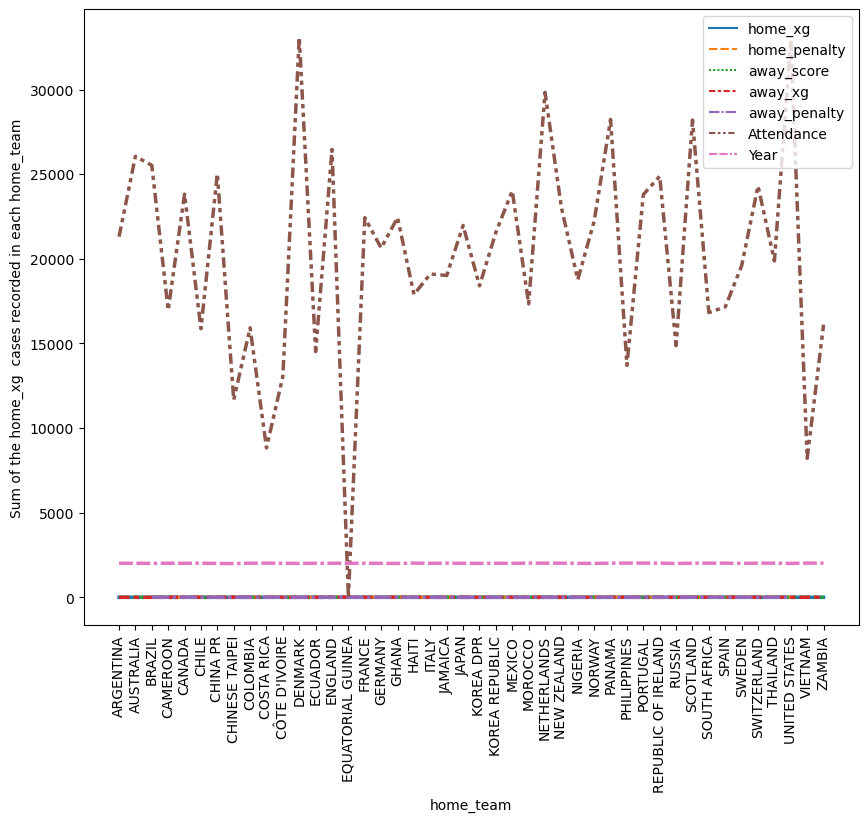

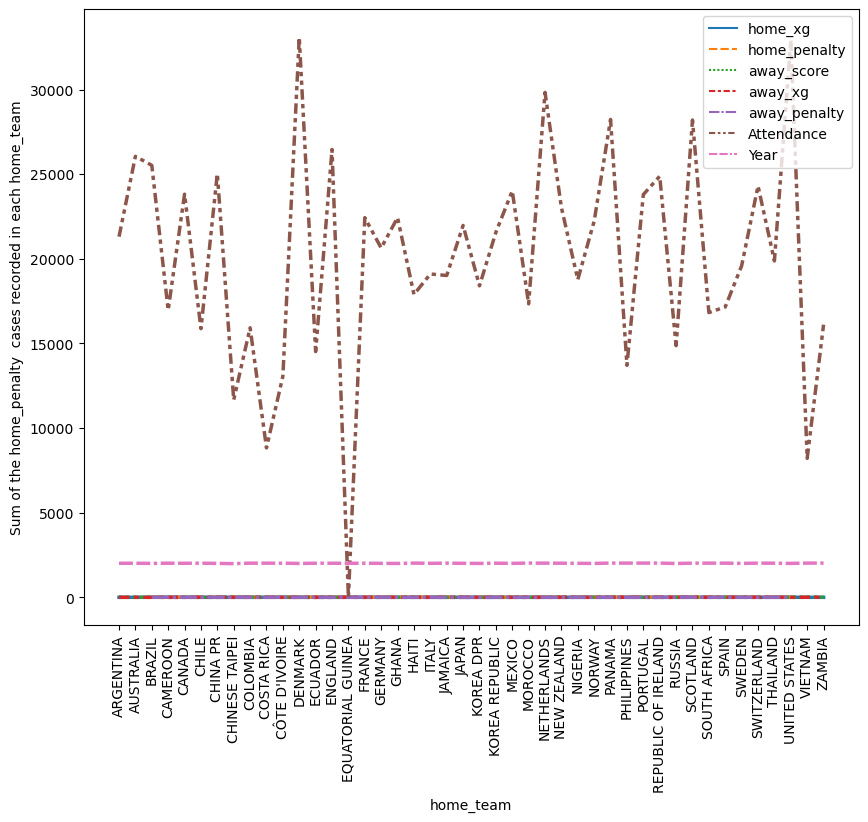

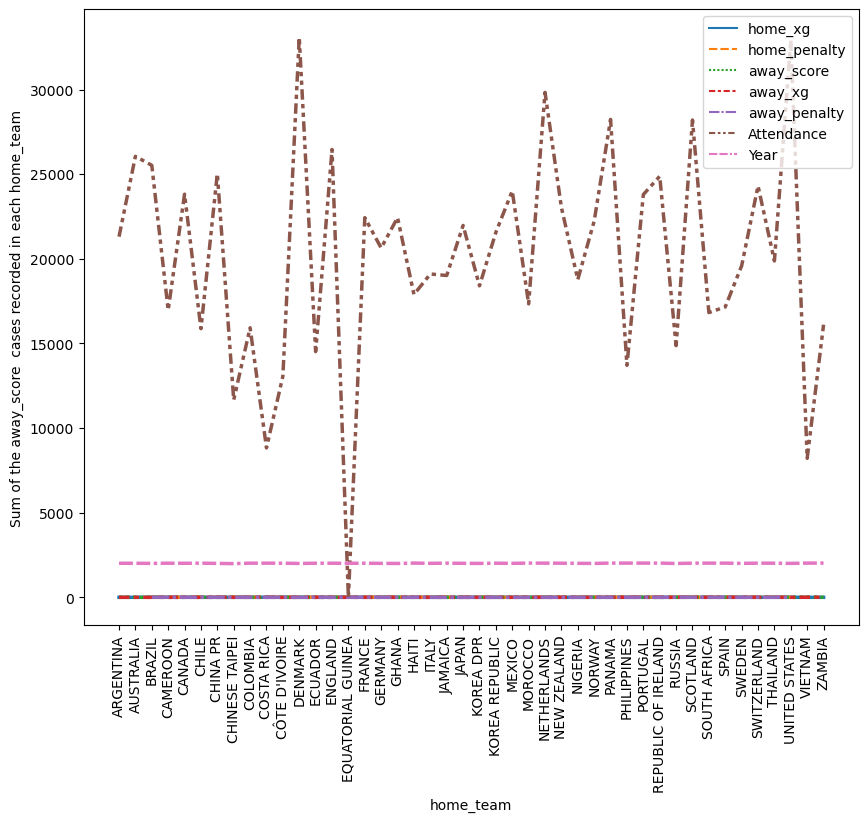

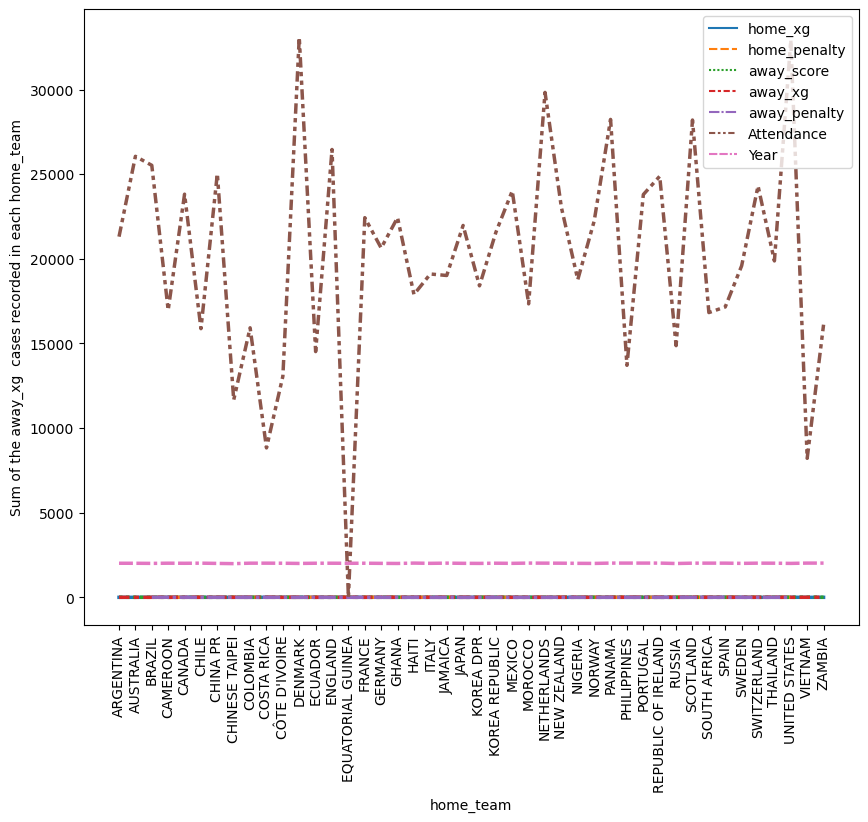

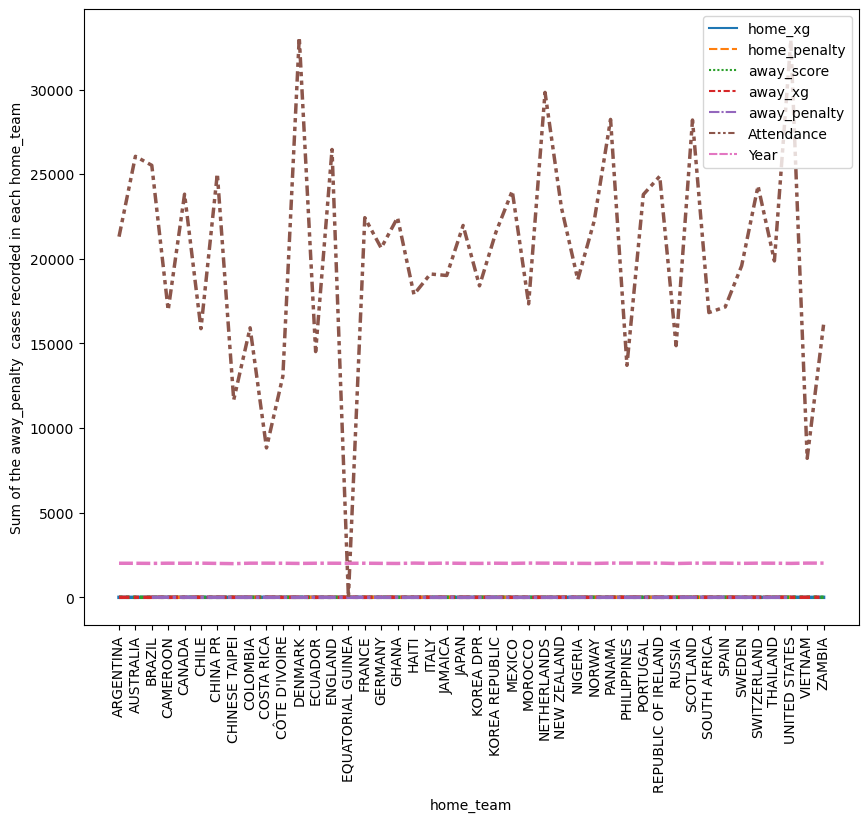

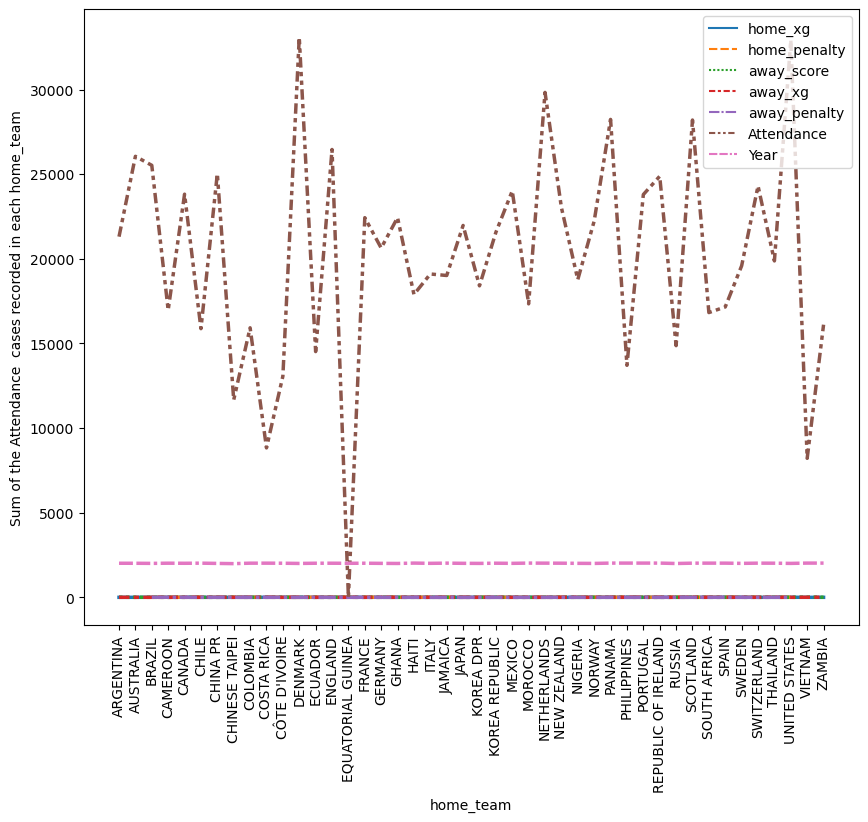

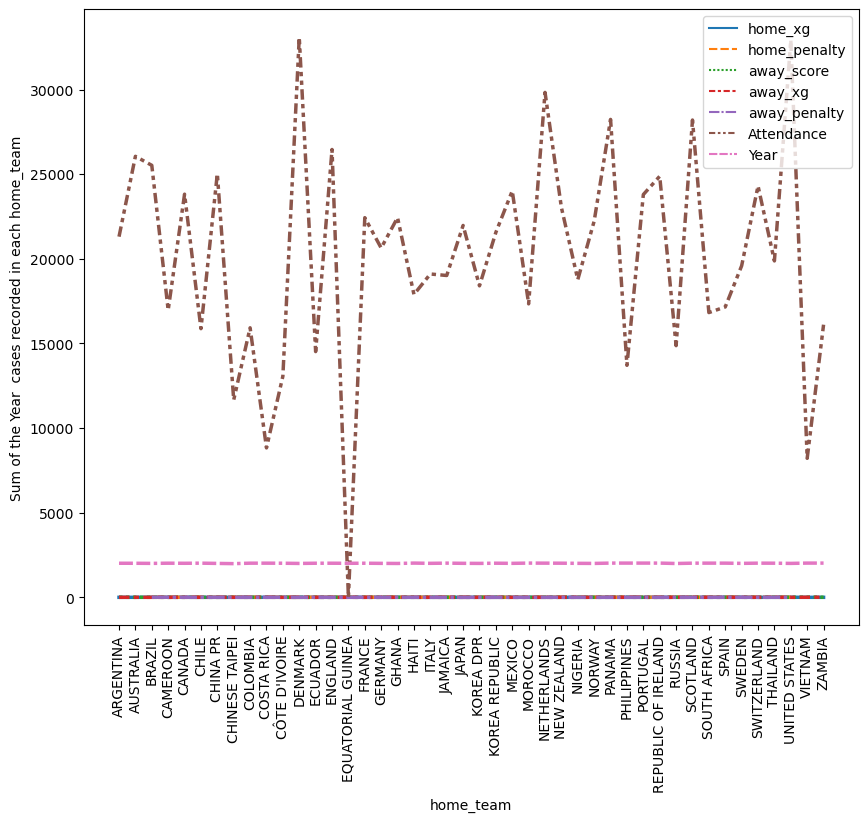

In [12]:
finally_data=data.groupby(['home_team']).mean()
finally_data=finally_data.drop('home_score',axis=1)
for i in finally_data:
    plt.figure(figsize=(10,8))
    sns.lineplot(data=finally_data, palette="tab10", linewidth=2.5)
    plt.ylabel(f'Visualize the average {i} cases recorded in home_team')
    plt.xlabel("home_team")
    plt.xticks(rotation=90)
    plt.ylabel(f'Sum of the {i}  cases recorded in each home_team')
    plt.show()

# Final note


In the Data Visualization part, we applied various methods such as groupby and where conditions to uncover interesting facts about team . We visualized the data using , bar charts, and line charts, which allowed us to gain valuable insights.

Through these visualizations, we discovered several intriguing patterns and trends. These findings provide valuable information about the prevalence and distribution of cases involving women.

Thank you